# House Price Prediction

Lifecycle of Data Science Projects :
1] Data Analysis
2] Feature Engg
3] Feature Selection
4] Model Building 
5] Model Deployment

#### Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.shape

(1460, 81)

#### Data Analysis :
1] Missing Values
2] Numerical Variables
3] Distribution of Numerical Variables
4] Categorical Variables
5] Cardinality of Categorical Variables
6] Outliers
7] Relnship b/w Independent Variables & Dependent Variable (here, SalePrice)

#### Missing Values

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.columns[3]

'LotFrontage'

In [5]:
df_cols_list = list(df.columns)
df_cols_list

features_with_na = [feature_name for feature_name in df_cols_list
    if df[feature_name].isnull().sum() > 1]

# for feature_name in df_cols_list:
#     if df[feature_name].isnull().sum() > 1:
#         features_with_na.insert(feature_name)
        
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
for feature_name in features_with_na:
    print('Feature : ', feature_name, ' || Missing values percentage : ', np.round(df[feature_name].isnull().mean(), 4))

Feature :  LotFrontage  || Missing values percentage :  0.1774
Feature :  Alley  || Missing values percentage :  0.9377
Feature :  MasVnrType  || Missing values percentage :  0.0055
Feature :  MasVnrArea  || Missing values percentage :  0.0055
Feature :  BsmtQual  || Missing values percentage :  0.0253
Feature :  BsmtCond  || Missing values percentage :  0.0253
Feature :  BsmtExposure  || Missing values percentage :  0.026
Feature :  BsmtFinType1  || Missing values percentage :  0.0253
Feature :  BsmtFinType2  || Missing values percentage :  0.026
Feature :  FireplaceQu  || Missing values percentage :  0.4726
Feature :  GarageType  || Missing values percentage :  0.0555
Feature :  GarageYrBlt  || Missing values percentage :  0.0555
Feature :  GarageFinish  || Missing values percentage :  0.0555
Feature :  GarageQual  || Missing values percentage :  0.0555
Feature :  GarageCond  || Missing values percentage :  0.0555
Feature :  PoolQC  || Missing values percentage :  0.9952
Feature :  F

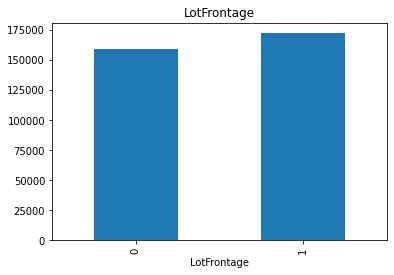

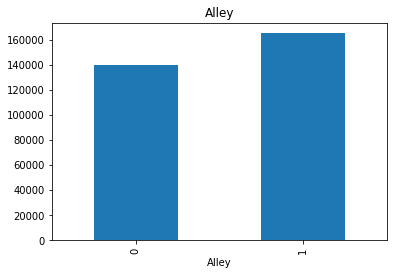

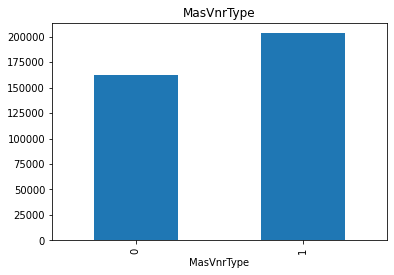

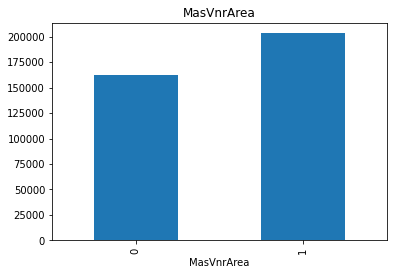

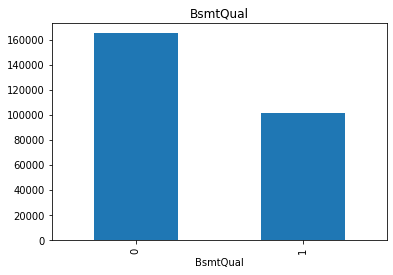

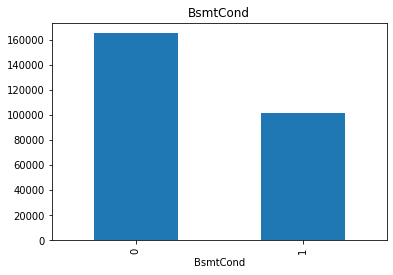

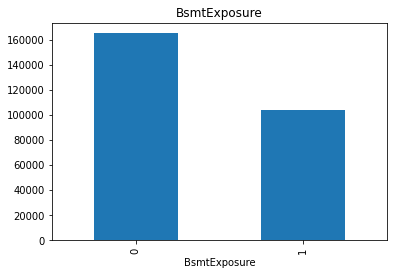

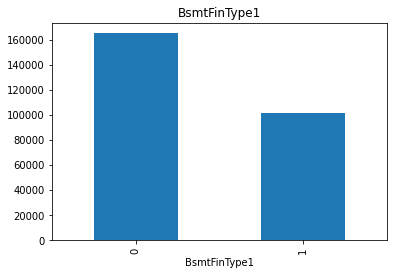

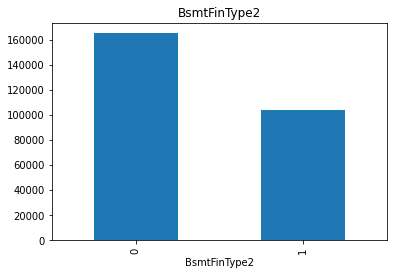

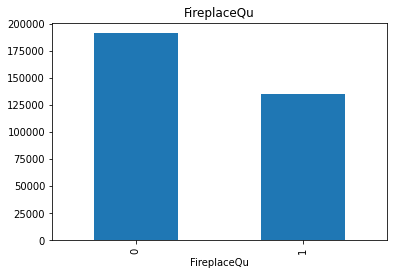

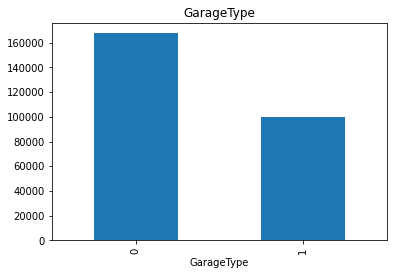

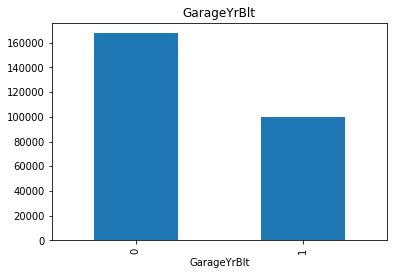

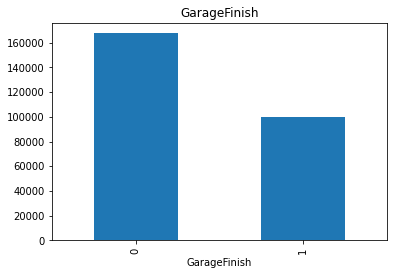

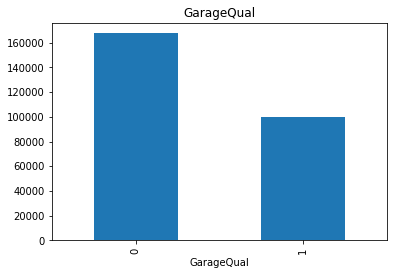

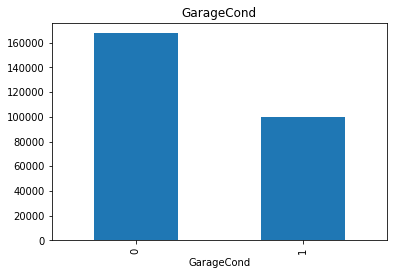

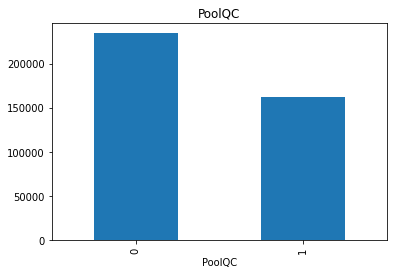

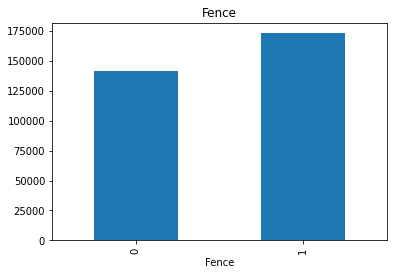

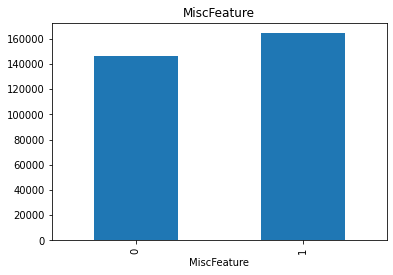

In [7]:
for feature_name in features_with_na:
    data = df.copy()
    
    data[feature_name] = np.where(data[feature_name].isnull(), 1, 0)
    
    data.groupby(feature_name)['SalePrice'].median().plot.bar()
    plt.title(feature_name)
    plt.show()

In [8]:
#Numerical Variables

print("Id of Houses {}".format(len(df.Id)))

numerical_features = []

for feature in df_cols_list:
    i = 0
    if df[feature].dtypes != 'O':
        numerical_features.insert(i, feature)
        i = i + 1

numerical_features 

print('No. of numerical features : ', len(numerical_features))

df[numerical_features].head()

Id of Houses 1460
No. of numerical features :  38


,SalePrice,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,...,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,LotFrontage,MSSubClass,Id
0,208500,2008,2,0,0,0,0,0,61,0,...,706,196.0,2003,2003,5,7,8450,65.0,60,1
1,181500,2007,5,0,0,0,0,0,0,298,...,978,0.0,1976,1976,8,6,9600,80.0,20,2
2,223500,2008,9,0,0,0,0,0,42,0,...,486,162.0,2002,2001,5,7,11250,68.0,60,3
3,140000,2006,2,0,0,0,0,272,35,0,...,216,0.0,1970,1915,5,7,9550,60.0,70,4
4,250000,2008,12,0,0,0,0,0,84,192,...,655,350.0,2000,2000,5,8,14260,84.0,60,5


In [9]:
#Temporal Variables

year_features_list = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_features_list
print('No. of temporal variables : ', len(year_features_list))
df[year_features_list].head()

No. of temporal variables :  4


,YrSold,GarageYrBlt,YearRemodAdd,YearBuilt
0,2008,2003.0,2003,2003
1,2007,1976.0,1976,1976
2,2008,2001.0,2002,2001
3,2006,1998.0,1970,1915
4,2008,2000.0,2000,2000


In [12]:
for feature in year_features_list:
    print(feature, df[feature].unique())

YrSold [2008 2007 2006 2009 2010]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YearBuilt [2003 1976 2001 1915 2

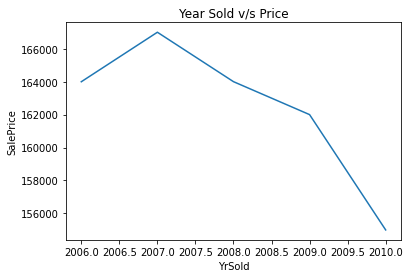

In [11]:
#Year Sold v/s Price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('Year Sold v/s Price')
plt.show()

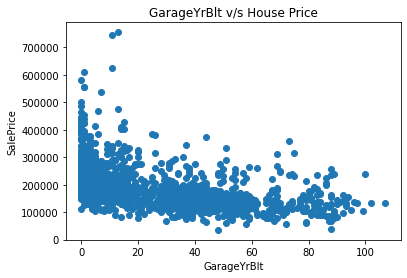

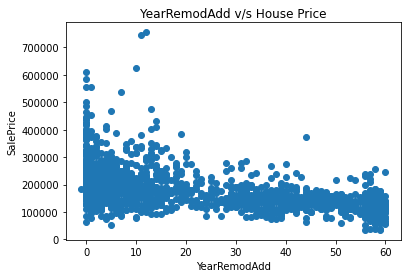

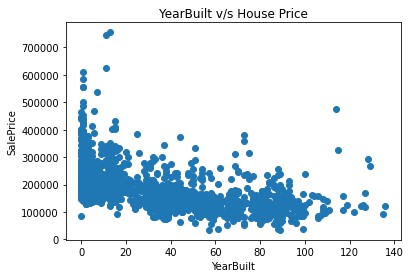

In [23]:
#Year features v/s House Price

for feature in year_features_list:
    dataset = df.copy()
    if feature != 'YrSold':
            df[feature] = dataset['YrSold'] - dataset[feature]
            plt.scatter(dataset[feature], dataset['SalePrice'])
            plt.xlabel(feature)
            plt.ylabel('SalePrice')
            plt.title(feature + ' v/s House Price')
            plt.show()

In [24]:
# Discrete Varibles

discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features_list + ['Id']]

print('No. of discrete features are {}'.format(len(discrete_features)))

discrete_features

No. of discrete features are 17


['MoSold',
 'MiscVal',
 'PoolArea',
 '3SsnPorch',
 'GarageCars',
 'Fireplaces',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'BsmtFullBath',
 'LowQualFinSF',
 'OverallCond',
 'OverallQual',
 'MSSubClass']

In [25]:
df[discrete_features].head()

,MoSold,MiscVal,PoolArea,3SsnPorch,GarageCars,Fireplaces,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,LowQualFinSF,OverallCond,OverallQual,MSSubClass
0,2,0,0,0,2,0,8,1,3,1,2,0,1,0,5,7,60
1,5,0,0,0,2,1,6,1,3,0,2,1,0,0,8,6,20
2,9,0,0,0,2,1,6,1,3,1,2,0,1,0,5,7,60
3,2,0,0,0,3,1,7,1,3,0,1,0,1,0,5,7,70
4,12,0,0,0,3,1,9,1,4,1,2,0,1,0,5,8,60


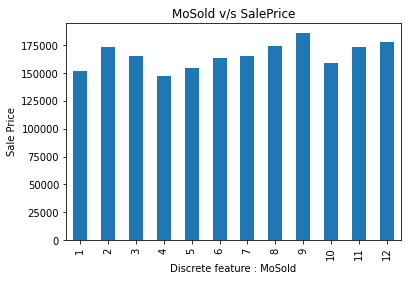

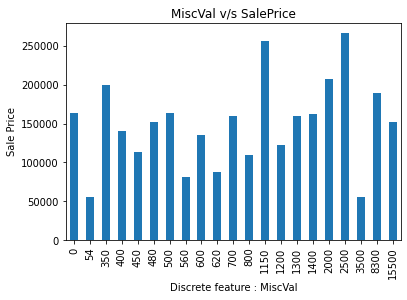

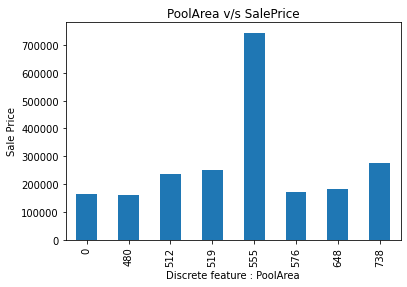

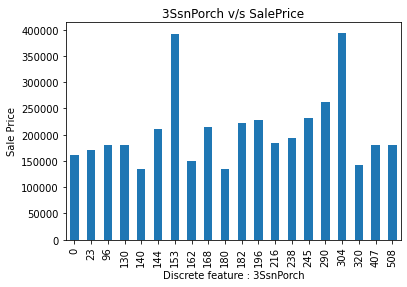

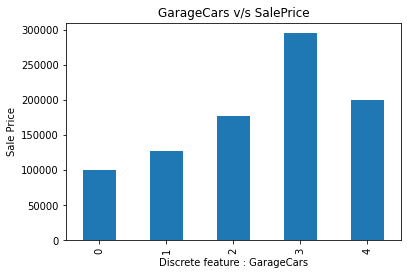

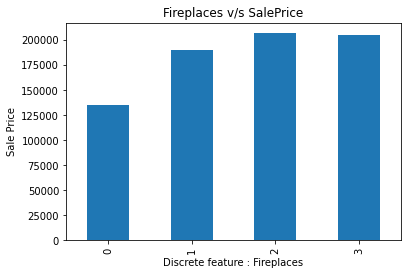

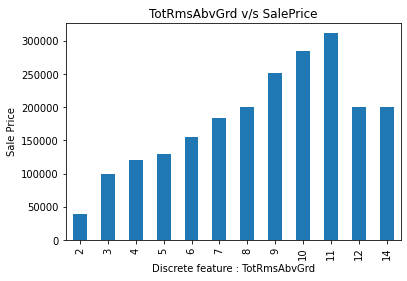

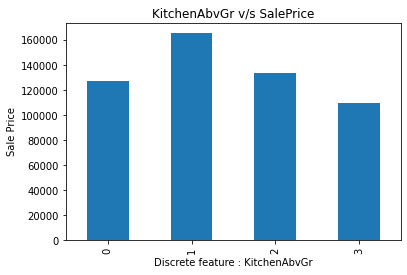

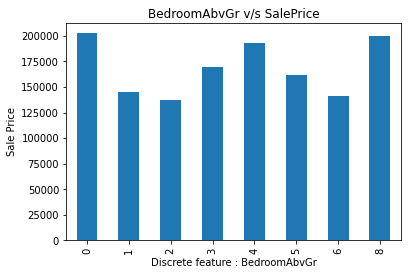

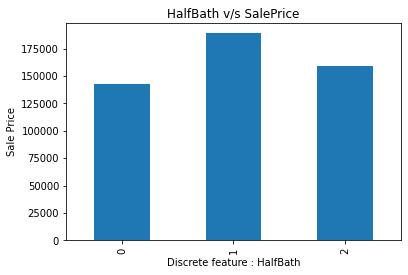

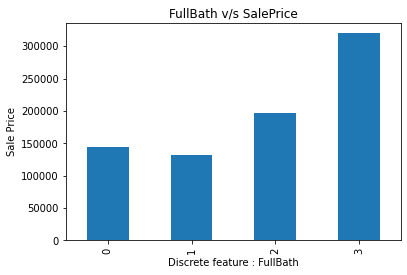

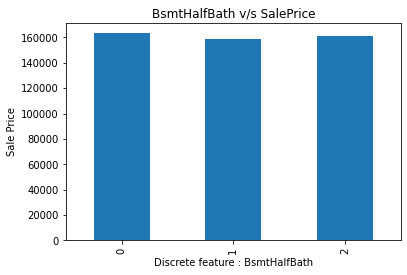

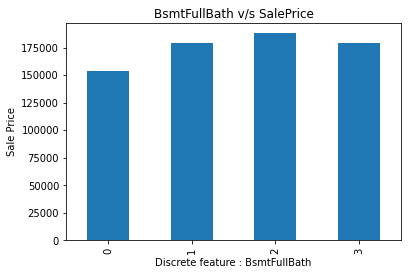

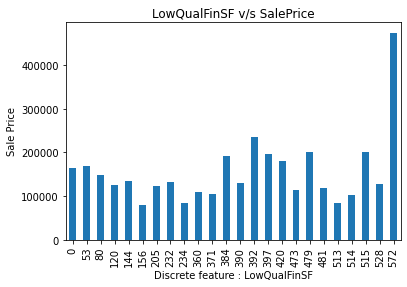

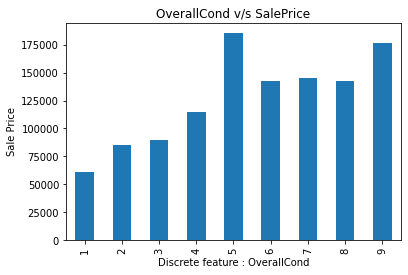

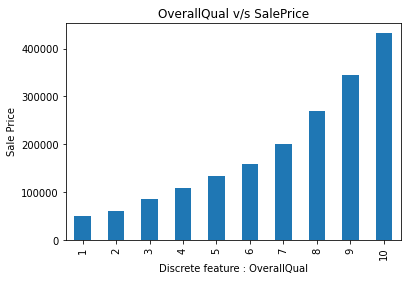

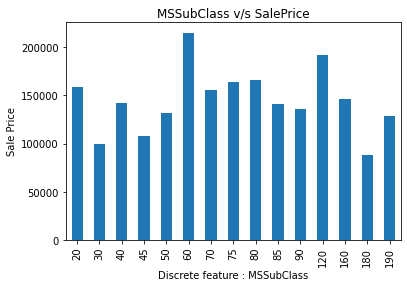

In [29]:
for feature in discrete_features:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel('Discrete feature : {}'.format(feature))
    plt.ylabel('Sale Price')
    plt.title('{} v/s SalePrice'.format(feature))
    plt.show()

In [34]:
# Continuous Variable

continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features_list + ['Id']]

print('No. of continuous features : {}'.format(len(continuous_features)))

continuous_features

No. of continuous features : 16


['SalePrice',
 'ScreenPorch',
 'EnclosedPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'GarageArea',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'MasVnrArea',
 'LotArea',
 'LotFrontage']

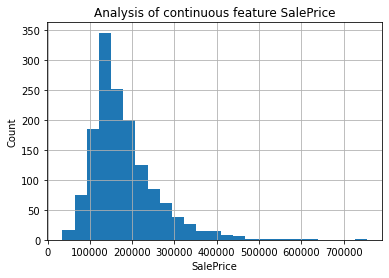

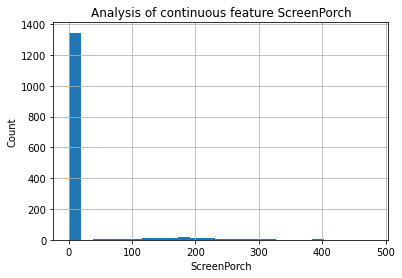

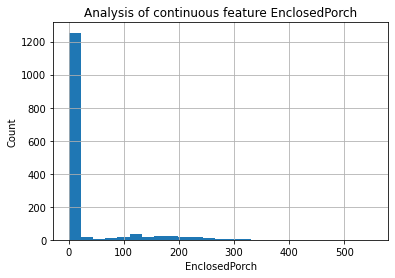

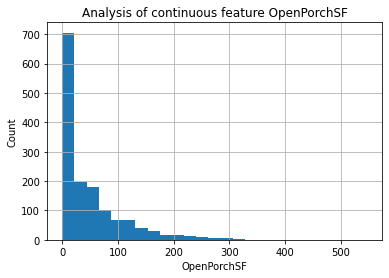

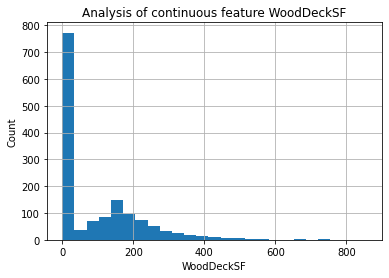

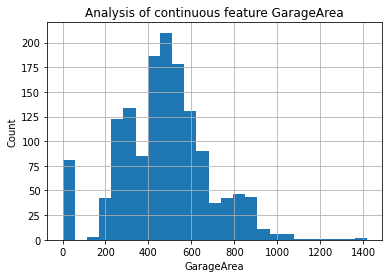

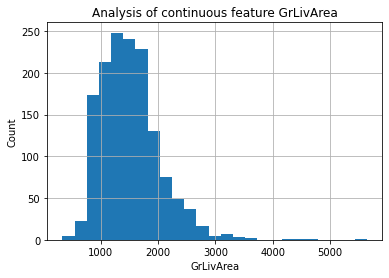

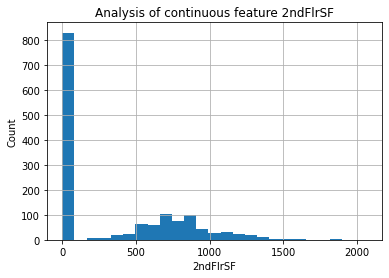

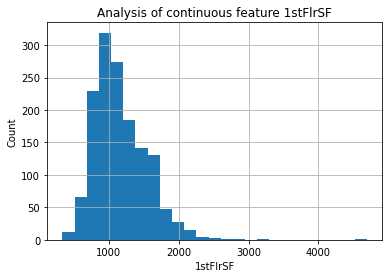

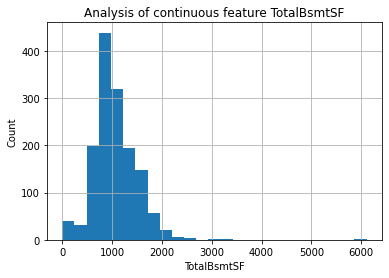

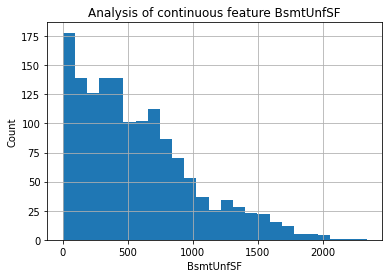

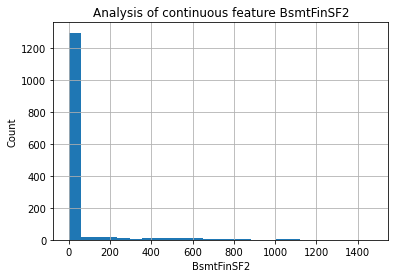

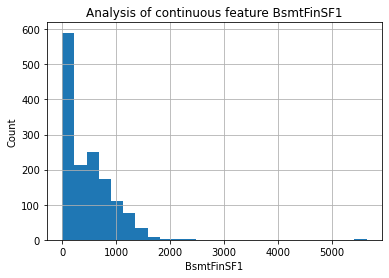

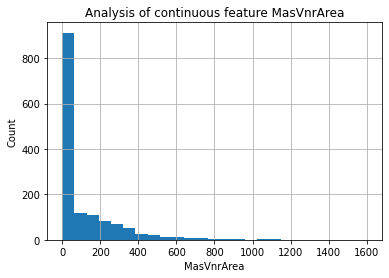

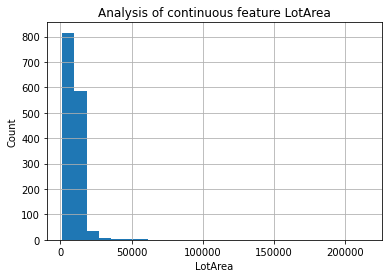

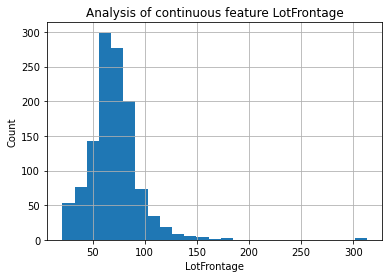

In [36]:
for feature in continuous_features:
    dataset = df.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Analysis of continuous feature {}'.format(feature))
    plt.show()

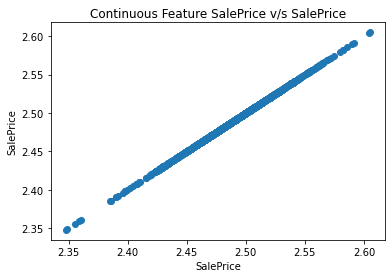

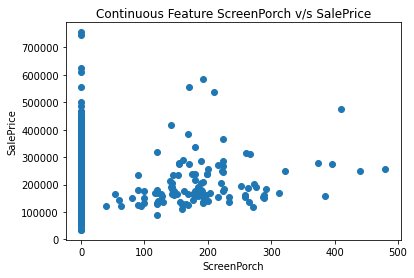

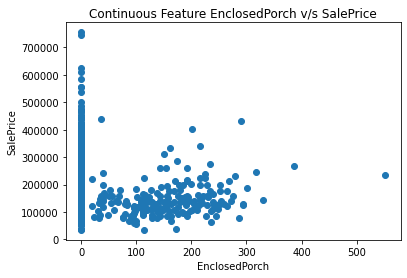

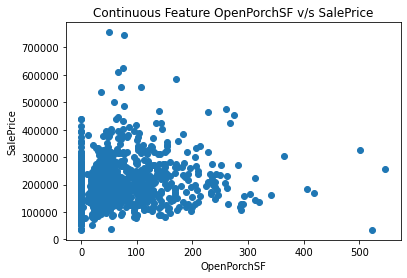

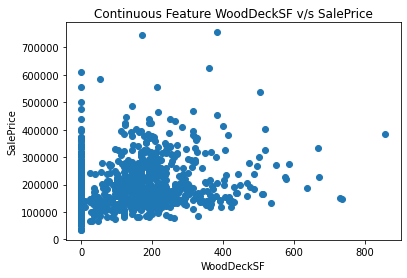

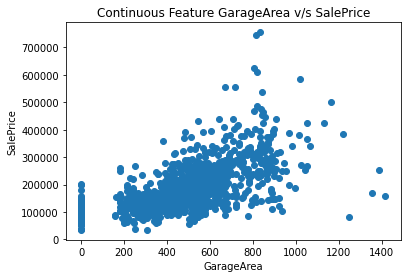

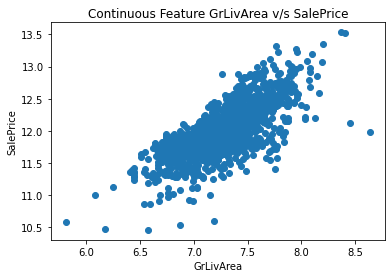

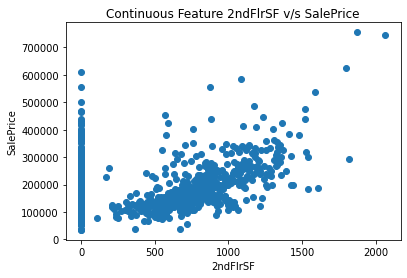

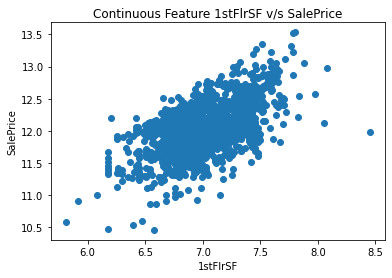

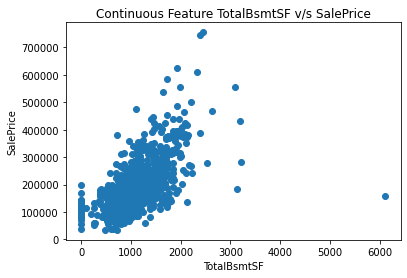

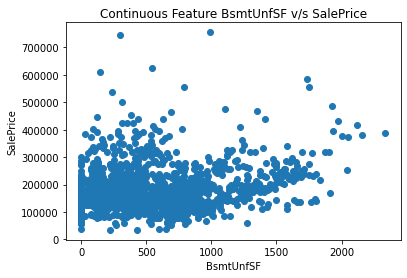

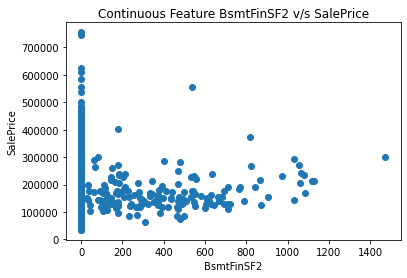

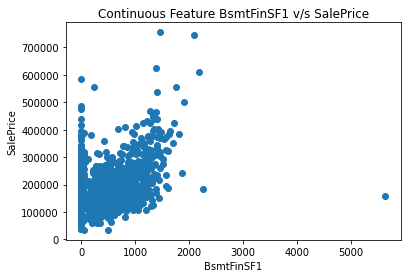

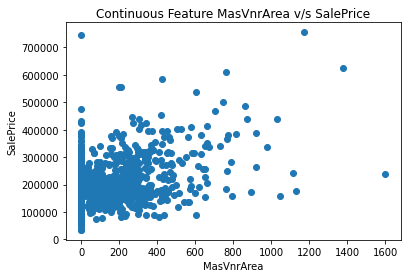

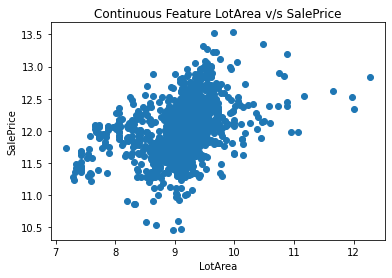

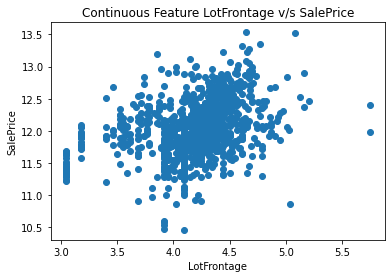

In [38]:
# For regression, the data should be in gaussian distribution...so logarithmic transformation is needed

for feature in continuous_features:
    dataset = df.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
    
    plt.scatter(dataset[feature], dataset['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('Continuous Feature {} v/s SalePrice'.format(feature))
    plt.show()

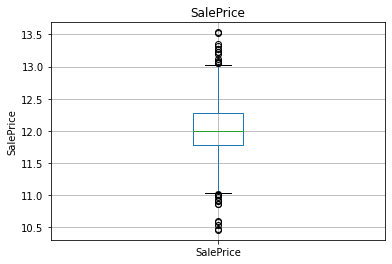

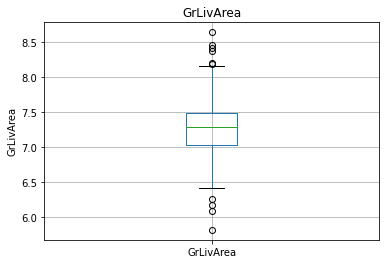

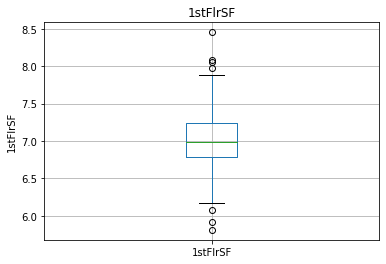

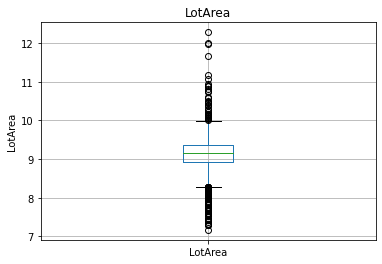

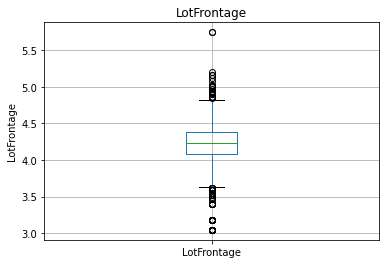

In [41]:
# Outliers

for feature in continuous_features:
    dataset = df.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    

In [42]:
# Categorical Variables

categorical_features = [feature for feature in df_cols_list if df[feature].dtypes == 'O']
print('No. of categorical features : {}'.format(len(categorical_features)))
categorical_features

No. of categorical features : 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [43]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Feature : MSZoning | No. of categories : 5
Feature : Street | No. of categories : 2
Feature : Alley | No. of categories : 3
Feature : LotShape | No. of categories : 4
Feature : LandContour | No. of categories : 4
Feature : Utilities | No. of categories : 2
Feature : LotConfig | No. of categories : 5
Feature : LandSlope | No. of categories : 3
Feature : Neighborhood | No. of categories : 25
Feature : Condition1 | No. of categories : 9
Feature : Condition2 | No. of categories : 8
Feature : BldgType | No. of categories : 5
Feature : HouseStyle | No. of categories : 8
Feature : RoofStyle | No. of categories : 6
Feature : RoofMatl | No. of categories : 8
Feature : Exterior1st | No. of categories : 15
Feature : Exterior2nd | No. of categories : 16
Feature : MasVnrType | No. of categories : 5
Feature : ExterQual | No. of categories : 4
Feature : ExterCond | No. of categories : 5
Feature : Foundation | No. of categories : 6
Feature : BsmtQual | No. of categories : 5
Feature : BsmtCond | No. of

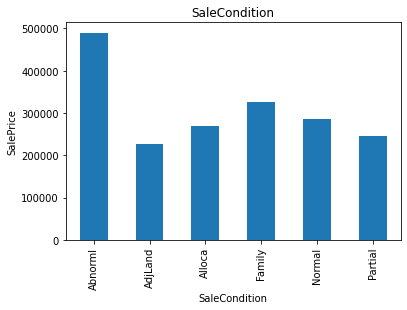

In [45]:
for feature in categorical_features:
    dataset = df.copy()
    print('Feature : {} | No. of categories : {}'.format(feature, len(dataset[feature].unique())))

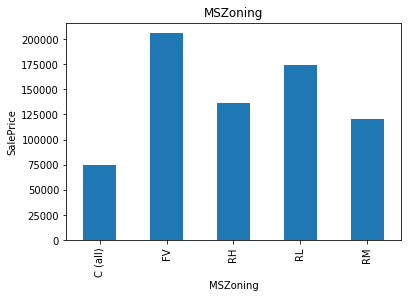

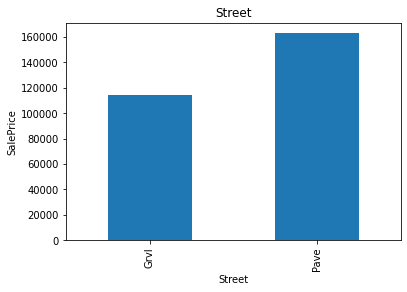

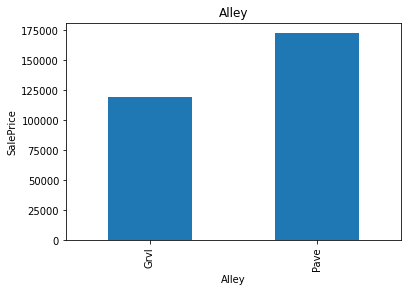

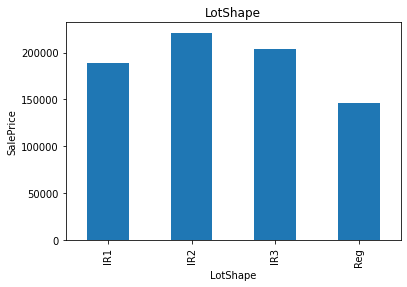

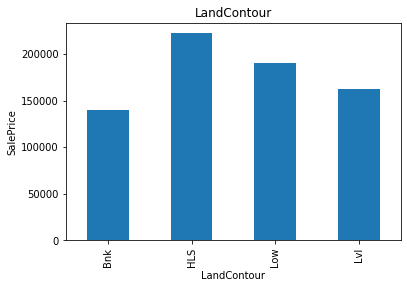

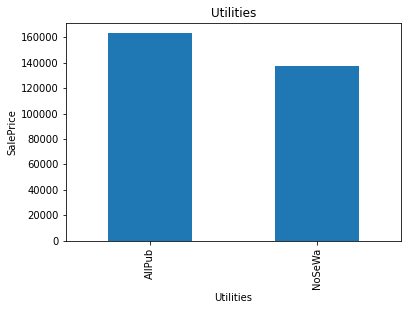

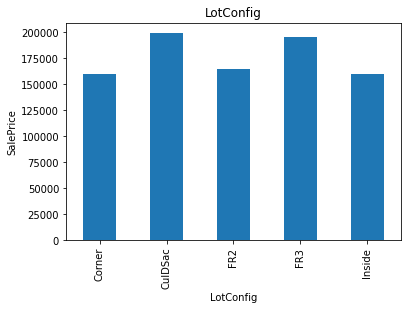

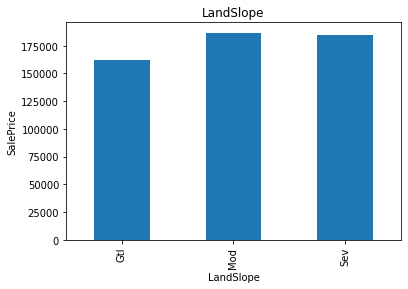

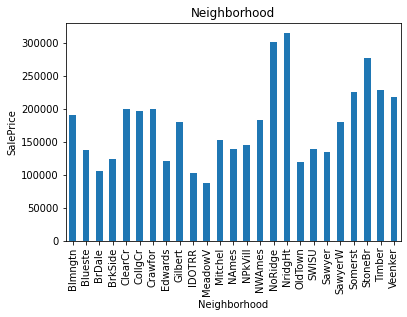

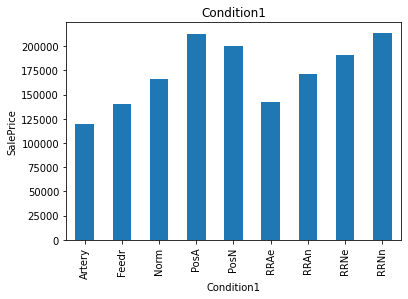

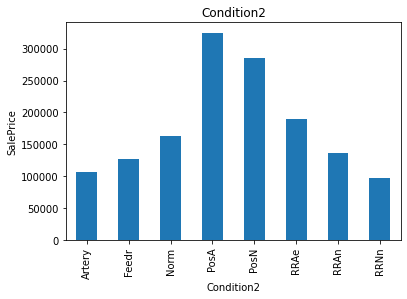

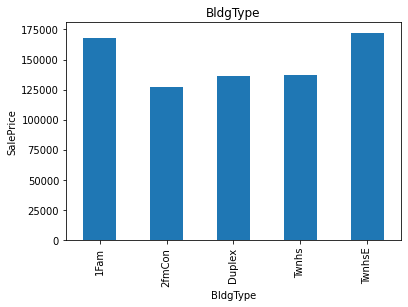

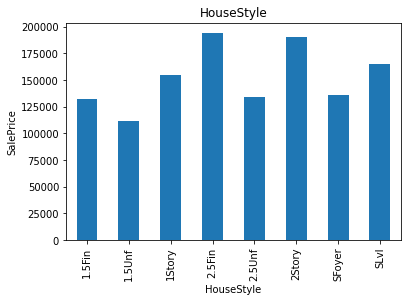

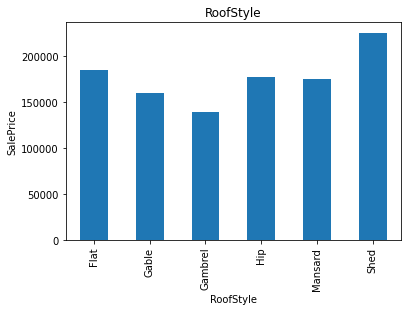

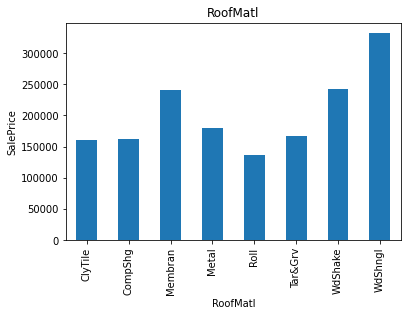

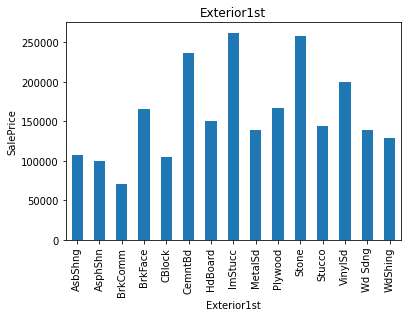

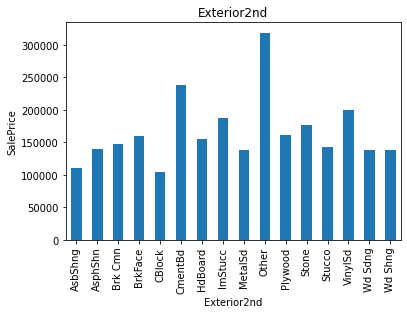

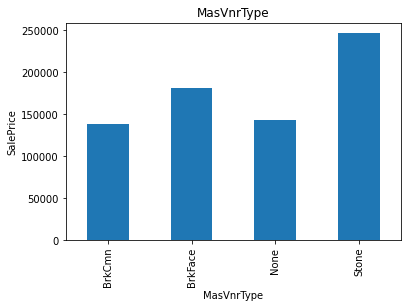

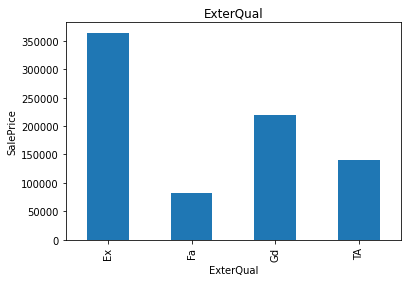

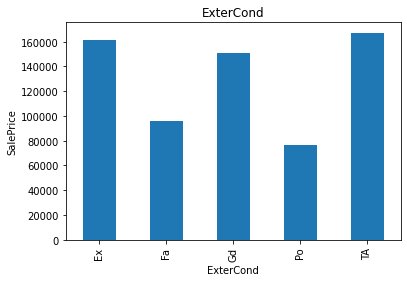

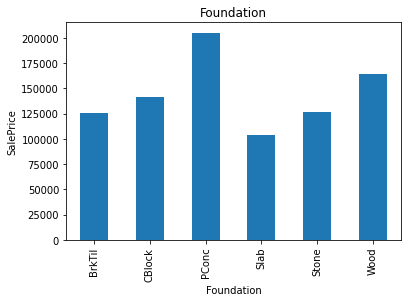

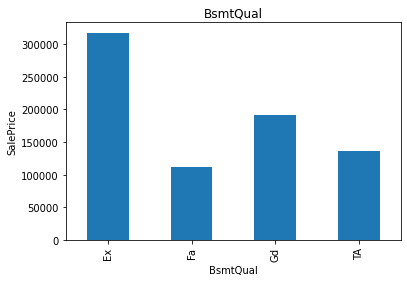

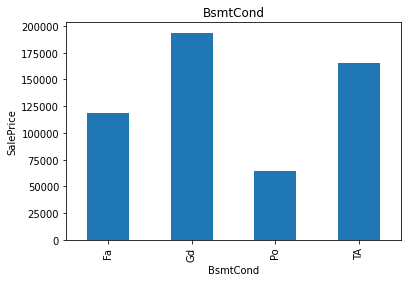

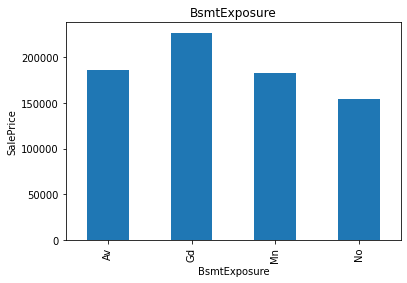

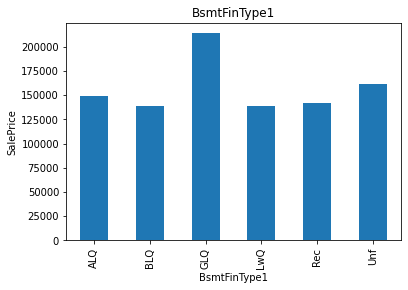

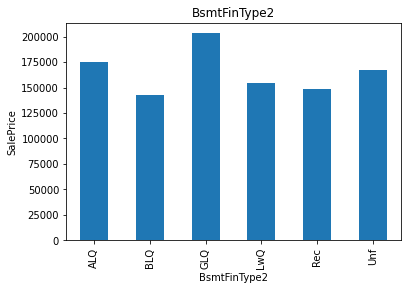

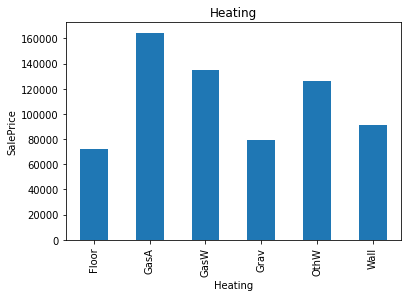

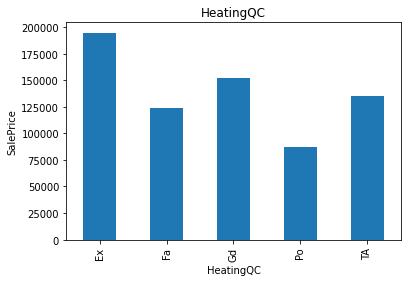

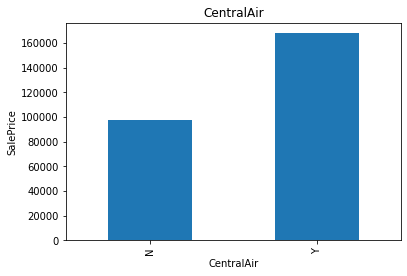

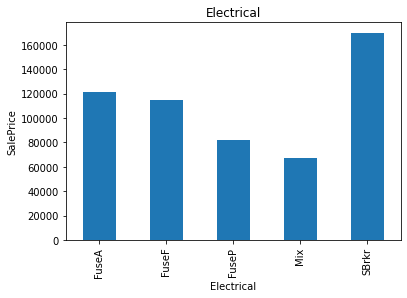

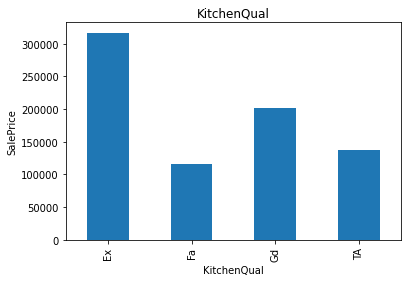

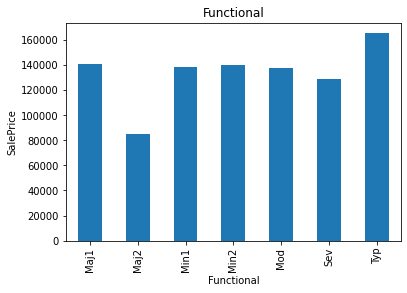

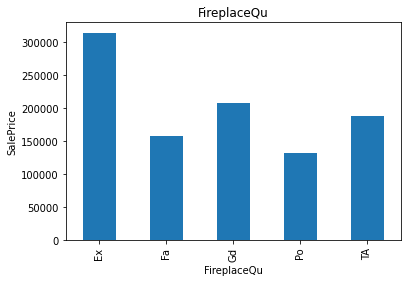

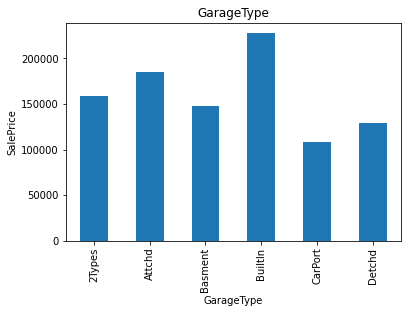

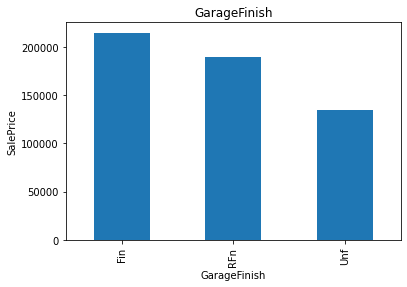

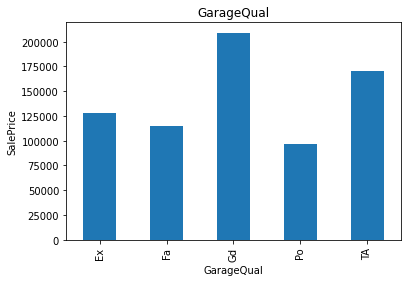

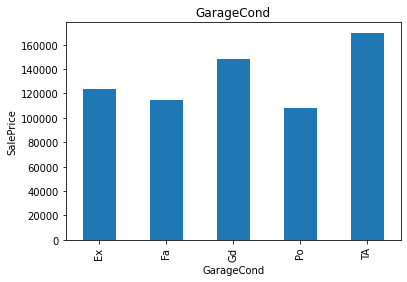

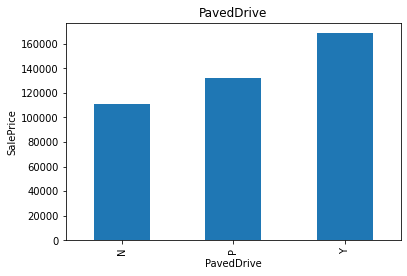

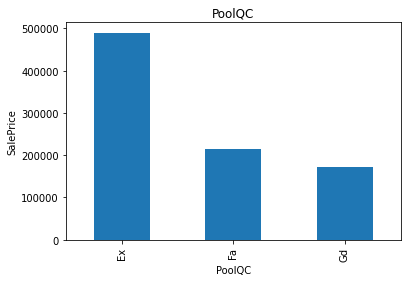

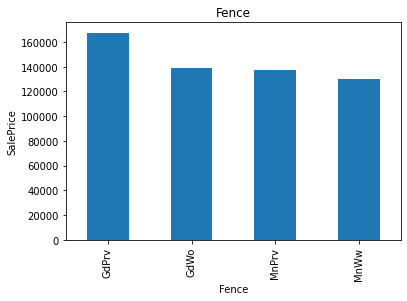

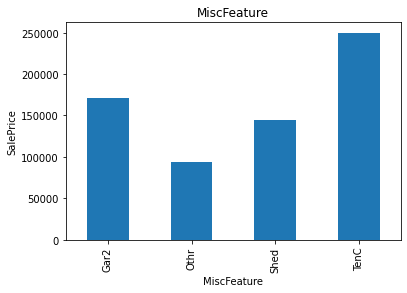

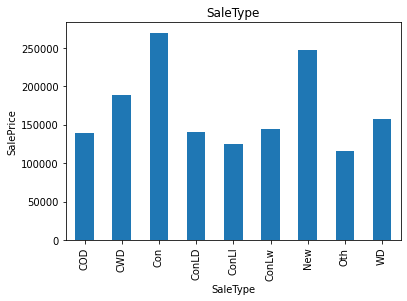

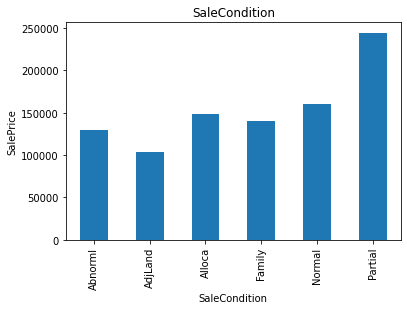

In [48]:
for feature in categorical_features:
    dataset = df.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()